In [12]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target,test_size=0.3,random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

Accuracy 0.9473684210526315
Precision 0.9541284403669725
Recall 0.9629629629629629


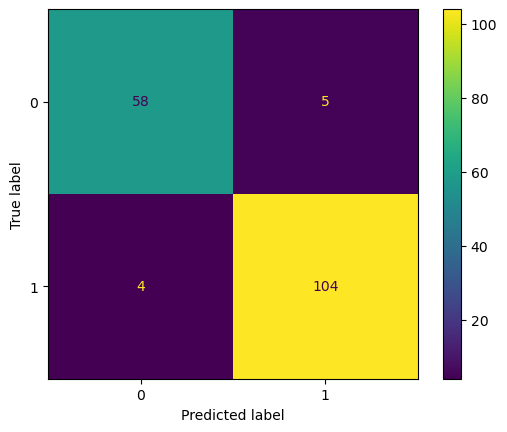

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

#print precision
precision = precision_score(y_test, y_pred)
print("Precision", precision)

#print recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

#print matrix
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

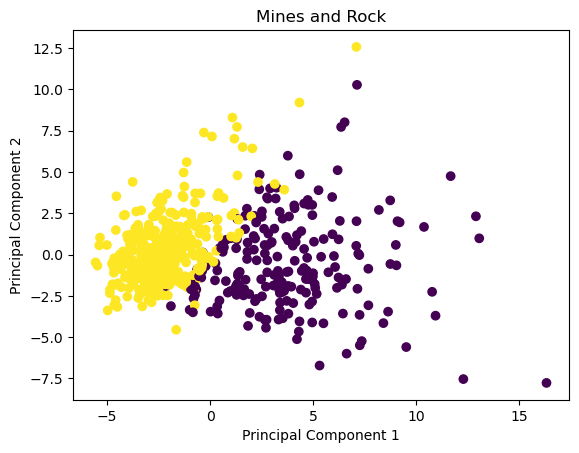

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
scaler = StandardScaler()
X_scale = scaler.fit_transform(cancer_data.data)
X_pca= pca.fit_transform(X_scale)

# Hiển thị kết quả dữ liệu đã giảm chiều trên màn hình
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= cancer_data.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mines and Rock')
plt.show()

Accuracy of logistic regression 0.9707602339181286
Precison of logistic regression 0.9724770642201835
Recall of logistic regression class 0.9814814814814815


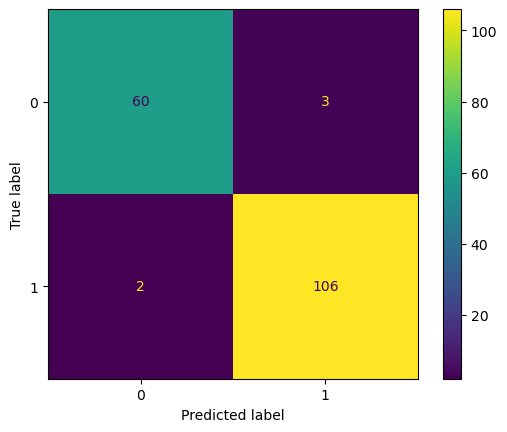

In [22]:
from sklearn.linear_model import LogisticRegression

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, cancer_data.target, test_size=0.30, random_state=109)
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

y_pre_lr = lr.predict(X_test_pca)

#print accuracy
accuracy_lr =  accuracy_score(y_test, y_pre_lr)
print("Accuracy of logistic regression", accuracy_lr)

#print precison
precision_lr = precision_score(y_test,y_pre_lr)
print('Precison of logistic regression', precision_lr)

#print recall
recall_lr = recall_score(y_test, y_pre_lr)
print('Recall of logistic regression class', recall_lr)

#print matrix
matrix_lr = confusion_matrix(y_test, y_pre_lr)
ConfusionMatrixDisplay(matrix_lr).plot()